## Baseline -  #700055807

In [2]:
#importing all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score,fbeta_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
#importing white wine data set (UCI https://archive.ics.uci.edu/ml/datasets/wine+quality)
wine_df = pd.read_csv('data/winequality-white.csv', sep=';')
data = wine_df.copy()

In [4]:
#Creating the catigorical target, less than 8 as 0 and more than 8 as 1
data['type'] = np.where(data['quality'] < 8, 'bad', 'good')

In [5]:

data['type'].value_counts(normalize=True) * 100

bad     96.325031
good     3.674969
Name: type, dtype: float64

In [10]:
# using the enconder to code 0,1 for bad and good respectvily 
le = LabelEncoder()
data['target'] = le.fit_transform(data['type'])

Text(0.5, 1.0, 'Imbalanced Wine Quality Target Variable')

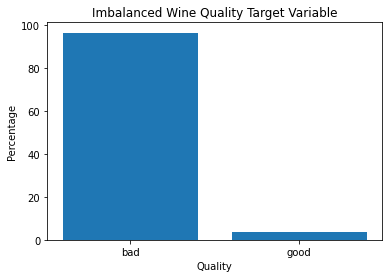

In [13]:
d = data['type'].value_counts(normalize=True) * 100
plt.bar(d.index, d)
plt.xlabel('Quality')
plt.ylabel('Percentage')
plt.title('Imbalanced Wine Quality Target Variable')

Text(0.5, 1.0, 'Imbalanced Wine Quality Target Variable by Count')

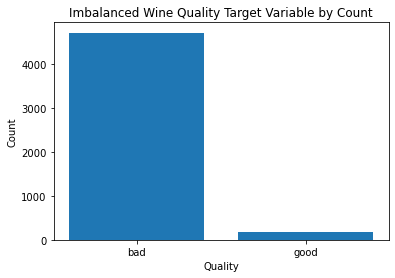

In [12]:
d = data['type'].value_counts()
plt.bar(d.index, d)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Imbalanced Wine Quality Target Variable by Count')

In [15]:
# setting the X, y and splitting for baseline set
y = data.iloc[:,-1]

In [16]:
X = data.iloc[:,:-3]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [18]:
# inilize classifiers
DT = DecisionTreeClassifier()
Log = LogisticRegression()
RF = RandomForestClassifier()

In [20]:
# running the classifiers for the baseline
model_scores = {}
model_roc_scores = {}
model_fbeta_score = {}
precision_scores = {}

DT = DecisionTreeClassifier()
Log = LogisticRegression()
RF = RandomForestClassifier()

for model in [DT, Log, RF]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    model_scores[model] = score
    
    y_pred_proba = model.predict_proba(X_test)
    roc = roc_auc_score(y_test, y_pred_proba[:,1])
    model_roc_scores[model] = roc
    
    y_pred_proba = model.predict_proba(X_test)
    fb_score = fbeta_score(y_test, y_pred, beta=0.5)
    model_fbeta_score[model] = fb_score
    
    y_pred = model.predict(X_test)
    p_score = precision_score(y_test, y_pred)
    precision_scores[model] = p_score
    
#capturing all scores - baseline    
model_scores
model_roc_scores
model_fbeta_score
precision_scores

roc_df = pd.DataFrame(list(model_roc_scores.items()),columns = ['Model','Roc Auc Score']) 
scores_df = pd.DataFrame(list(model_scores.items()),columns = ['Model1','Accuracy Score'])
precision_scores_df = pd.DataFrame(list(precision_scores.items()), columns=['Model3','Precision Score'])
fbeta_scores_df = pd.DataFrame(list(model_fbeta_score.items()), columns=['Model2','F_beta Score'])


#creating the df for comparing the classifiers
total_scores_df = pd.concat([roc_df,scores_df ,precision_scores_df, fbeta_scores_df], axis=1)
total_scores_df.drop(['Model1', 'Model2', 'Model3'], axis=1, inplace=True)
total_scores_df.index.name = 'TOMEK Sampling'
total_scores_df = total_scores_df.round(2)
total_scores_df.index = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier']
total_scores_df

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Roc Auc Score,Accuracy Score,Precision Score,F_beta Score
DecisionTreeClassifier,DecisionTreeClassifier(),0.76,0.94,0.36,0.39
LogisticRegression,LogisticRegression(),0.73,0.96,0.00,0.00
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",0.93,0.98,1.00,0.82


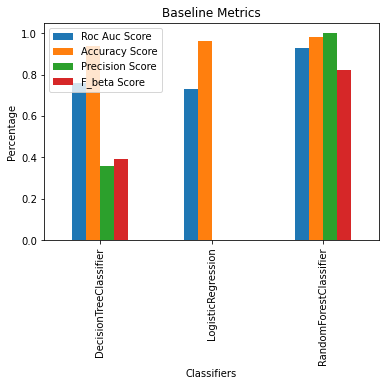

In [21]:
#plotting the comparison
total_scores_df.plot(kind='bar')
plt.title('Baseline Metrics')
plt.ylabel('Percentage')
plt.xlabel('Classifiers')
plt.show()


In [22]:
total_scores_df.drop('Model', axis=1)

,Roc Auc Score,Accuracy Score,Precision Score,F_beta Score
DecisionTreeClassifier,0.76,0.94,0.36,0.39
LogisticRegression,0.73,0.96,0.00,0.00
RandomForestClassifier,0.93,0.98,1.00,0.82


Text(33.0, 0.5, 'True Label')

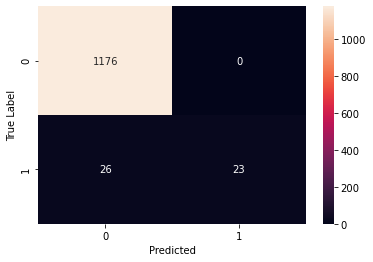

In [23]:
#showing heatmap of Decsion Tree baseline
DT_final_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(DT_final_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')